<font size=6  color=#003366> <b>[LEPL1109] - STATISTICS AND DATA SCIENCES </b><br><br> 
<b>Hackathon 03 - Classification: Do I need an umbrella tomorrow?  </b></font> <br><br><br>

<font size=5  color=#003366>
Prof. D. Hainaut<br>
Prof. L. Jacques<br>

<br><br>
Anne-Sophie Collin   (anne-sophie.collin@uclouvain.be)<br> 
Cécile Hautecoeur    (cecile.hautecoeur@uclouvain.be)<br> 
Guillaume Van Dessel (guillaume.vandessel@uclouvain.be)<br> 
Loïc Van Hoorebeeck  (loic.vanhoorebeeck@uclouvain.be)<br> 
<div style="text-align: right"> Version 2020</div>

<br><br>
</font>

<font size=5 color=#009999> <b>GUIDELINES & DELIVERABLES</b> </font> <br>
-  This assignment is due on November 30th (Monday) at noon.
-  Copying code or answers from other groups (or from the internet) is strictly forbidden. <br>**Each source of inspiration (stack overflow, git, other groups,...) must be clearly indicated!**
-  The notebook (with the "ipynb" extension) file must be delivered on **Moodle**. 
-  Apart from textual environments, comments, pieces of advice, ... the instructions are highlighted in <b>bold</b> within boxes (see below).

<div class="alert alert-warning">
<b>[Question 0] (Warm-Up) Getting in touch with the dataset. </b>  <br>
    <b>Read carefully</b> the meaning of the features in the link below; most of them refer to features that will be part of the dataset used in this hackathon.<br> 
</div> 

[Link here](http://www.bom.gov.au/climate/dwo/IDCJDW0000.pdf?fbclid=IwAR2xysXOMC6HHZjncUcq0SsFlonusQxvuaduFfYmn7fXEI7Y_IP-X-It3zs)

<i>Markdown</i> cells request from you that you explain your reasoning, answer an open question ... in plain text.<br> <i>Code</i> cells must be filled with Python code; during our work review your whole notebook should run all at once without any issue.
<br>
<br>

<font size=5 color=#009999> <b>CONTEXT & NOTEBOOK STRUCTURE</b> </font> <br>
    
In today's hackathon you will be confronted to a classical data science task, namely a *binary classification* thanks to a [thresholded output](http://pages.cs.wisc.edu/~matthewb/pages/notes/pdf/logistic/LogisticRegression.pdf) from a trained [logistic regression](https://web.stanford.edu/~jurafsky/slp3/5.pdf) model.<br><br> 

<img src="Imgs/good_or_bad.jpg" width = "400">

More specifically you are given a dataset of records about atmospheric conditions for a couple of locations in Australia, at different timestamps (days) together with the information: <font color=green>Yes</font> or <font color=red>No</font>, *has it rained* the day after the one considered in the timestamp (stored in the feature *RainTomorrow*) ? <br><br>Your ultimate goal resides in the building of the <i>most accurate predictor possible</i> (different measures will be studied) that determines, based on the same atmospheric conditions, ...etc, <b>whether or not people will need an umbrella tomorrow</b>. <br><br> 

We have divided this notebook to mimic a complete pipeline of common data science procedures. It is organized as follows:
* PART 1 - DATA PREPROCESSING
   - 1.1 - Import the data
   - 1.2 - Split the dataset
   - 1.3 - Deal with the NA values
    <br><br>
* PART 2 - EXPLORATORY DATA ANALYSIS (EDA)
    - 2.1 - Feature quality assessment
    - 2.2 - One to one relationships fetching
   <br><br>
* PART 3 - CLASSIFICATION / PERFORMANCE ESTIMATION
   - 3.1 - Brief feature selection
   - 3.2 - Cross-Validation as performance estimator
   
We filled this notebook with preliminary (trivial) code #factice. This practice makes possibble to run each cell, even the last ones, without throwing warnings. **Take advantage of this aspect to partion the work between all team's members!** <br><br>

In [2]:
# import of common utilitary librairies
import numpy as np
np.random.seed(333)
import pandas as pd
import matplotlib.pyplot as plt
import plotly as py
import plotly.express as px
import seaborn as sns
import plotly.graph_objs as go
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from plotly.offline import init_notebook_mode, iplot
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from scipy import stats
init_notebook_mode(connected=True)

# about data_test
import warnings
warnings.filterwarnings('ignore')

<font size=7 color=#009999> <b>PART 1 - DATA PREPROCESSING</b> </font> <br><br>

<font size=5 color=#009999> <b>1.1 - IMPORT THE DATA</b> 
</font> <br> <br>

<div class="alert alert-info">
<b>[Remark] Wait for the signal!</b>  <br>
Many of you might already know some standard techniques in order to clean and set up properly a raw dataset. We ask you to wait before applying transformations to the features, records, ... etc because this task will be driven by *instructions* that everybody must follow in the same fashion. <br> 
Therefore stay calm and patient, your time will come to show the TAs your data science skills in the questions that will arise slightly after.
</div> 

You have already learned how to import a dataset (e.g. "csv" extension) with the function <samp>read_csv</samp> from the well known <samp>pandas</samp> library.

Let us present a simple way to get an informative summary about this dataframe thanks to the function <samp>info</samp>.

In [3]:
data_full = pd.read_csv('Data/weatherAUS_stud.csv')
data_full.drop(columns=['Unnamed: 0'],inplace=True)
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In order to make sure that the import succeeded let us show the *10* first rows of *data*.

In [4]:
data_full.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


<font size=5 color=#009999> <b>1.2 - SPLIT THE DATASET </b>
</font> <br> <br>

In order to stay the most statistically significant when it comes to estimate your prediction fitness, one common action to be undertaken at the very beginning of any data science work is the split of the whole dataset into a learning chunk *data* (roughly $90\%$) and a test chunck *data_test* ($10\%$ remaining). 

Let's use the command <samp>train_test_split</samp> from <samp>sklearn.model_selection</samp> that achieves precisely this goal!

On this latter the exact same data processing steps will be executed before any prediction task. 

In [5]:
# thanks to sklearn this task is rather straightforwarfd 
data,data_test = train_test_split(data_full, test_size=0.1)

<font size=5 color=#009999> <b>1.3 - DEAL WITH THE NA VALUES </b>
</font> <br> <br>

We would like to be able to manually identify the features for which there are missing values. We will then come back later to their specific treatment!<br> 

This is what we have done for you so far: 

<b>Storing</b> the names of all the columns in a list <i>cols_all</i>, names of the columns with missing values in a list <i>cols_missing_values</i> and, finally, the clean columns in a list <i>cols_complete_values</i>. <br>

<b>Printing</b> the length of these lists.

In [6]:
# some handy functions user ready

"""
@pre: list total, list check
@post: returns a list remainder with elements of total that are not in list check
"""
def list_difference(total,check):
    return [elem for elem in total if elem not in check]


"""
@pre: 

data => pandas dataframe 
feature => string representing a feature of data for which the empirical distributions must be visualized
class_column => discriminative feature of data 
classes => list of possible values (classes) for the feature class_column passed in argument
color_scale => simple graphical artifact (list)

@post:

shows a discriminative boxplot (per class) of the observations about 'feature' stored in 'data'
"""
# code from https://info.cambridgespark.com/latest/eda-and-interactive-figures-with-plotly

def colored_Box(data, classes, feature, color_scale, class_column):
    traces = []
    for i in range(len(classes)):
        idx = data[class_column] == classes[i]
        class_trace = go.Box(
            y = data[idx][feature].values,
            name="class {}".format(classes[i]),
            boxpoints='suspectedoutliers',
            boxmean='sd',
            marker=dict(
                color=color_scale[i],
                outliercolor='rgba(255, 221, 23, 0.6)',
            )
        )
        traces.append(class_trace)
    return traces

In [7]:
# getting the names of the features with missing values 
cols_all = list(data.columns)
cols_missing_values = list(data.columns[data.isna().any()])
cols_complete_values = list_difference(cols_all,cols_missing_values)

# printing some informations
print('There are '+str(len(cols_all))+' features in total, including the target.')
print('For '+str(len(cols_missing_values))+' of them at least one record presents a missing/invalid value.')
print('The '+str(len(cols_complete_values))+' remaining features are complete.')

There are 23 features in total, including the target.
For 20 of them at least one record presents a missing/invalid value.
The 3 remaining features are complete.


<div class="alert alert-warning">
<b>[Question 1.1] Cleaning that messy dataset... </b>  <br>
There are plenty of ways to deal with data whose records/columns present invalid or missing values. <br> For the purpose of this hackathon <b><i>2</i> variants of data cleaning</b> are approached. 
<ol>
   <li> <i>Keep it all or drop it all</i>: it simply consists in dropping any record admitting at least one invalid entry. <br><br>
   <li> <i>Data rescue by clever filling and pruning</i>: follow the instructions.
</ol>    
    
<b>Implement</b> the second one and <b>cite</b>, for both, at least <i>1</i> pro and <i>1</i> con</b>. <br> 
</div> 

<font color=#7AABD4>**Make sure** to keep a copy of the original version of *data* at each step.</font> 

###  `Keep it all or drop it all`

<div class="alert alert-info">
<b>[Remark] Another thing for you!</b>  <br>
This variant is already implemented; it provides a dataset <i>data_drop_it_all</i> that can be used for Part 2. already. <br><b>Nevertheless</b> it remains to answer the qualitative questions about the pros/cons of that cleaning method.
</div> 


In [8]:
# creation of a smaller dataframe for which all the records are complete
data_drop_it_all = data.dropna()
data_drop_it_all.info()

# applying the same commands to our test batch 
data_test_drop_it_all = data_test.dropna()

# print header 
data_drop_it_all.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50772 entries, 64921 to 73708
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           50772 non-null  object 
 1   Location       50772 non-null  object 
 2   MinTemp        50772 non-null  float64
 3   MaxTemp        50772 non-null  float64
 4   Rainfall       50772 non-null  float64
 5   Evaporation    50772 non-null  float64
 6   Sunshine       50772 non-null  float64
 7   WindGustDir    50772 non-null  object 
 8   WindGustSpeed  50772 non-null  float64
 9   WindDir9am     50772 non-null  object 
 10  WindDir3pm     50772 non-null  object 
 11  WindSpeed9am   50772 non-null  float64
 12  WindSpeed3pm   50772 non-null  float64
 13  Humidity9am    50772 non-null  float64
 14  Humidity3pm    50772 non-null  float64
 15  Pressure9am    50772 non-null  float64
 16  Pressure3pm    50772 non-null  float64
 17  Cloud9am       50772 non-null  float64
 18  Cl

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
64921,2015-03-25,MelbourneAirport,10.9,21.9,0.0,6.2,6.3,S,31.0,W,...,56.0,38.0,1018.6,1013.5,7.0,7.0,12.3,20.9,No,No
13570,2013-12-03,Moree,15.4,34.1,0.0,10.0,13.4,SSE,37.0,NNE,...,49.0,15.0,1016.5,1011.1,0.0,1.0,22.8,32.0,No,No
133956,2011-12-02,AliceSprings,14.3,32.5,0.0,13.8,11.8,ESE,50.0,ESE,...,13.0,10.0,1013.3,1008.7,1.0,5.0,24.1,30.6,No,No
64667,2014-07-14,MelbourneAirport,6.6,12.4,0.4,0.8,2.1,N,37.0,N,...,94.0,62.0,1033.0,1028.4,7.0,7.0,8.4,11.2,No,No
60241,2010-05-21,Sale,6.8,15.4,1.8,0.4,4.0,ESE,26.0,WNW,...,96.0,58.0,1023.6,1021.6,7.0,5.0,9.9,14.1,Yes,No
64966,2015-05-09,MelbourneAirport,11.2,18.9,0.0,3.0,7.2,NNW,59.0,N,...,69.0,56.0,1013.9,1010.9,1.0,6.0,14.4,16.8,No,Yes
78405,2016-07-09,Watsonia,4.6,14.7,0.0,1.4,7.8,E,15.0,NNE,...,100.0,66.0,1025.5,1023.2,2.0,5.0,7.3,14.1,No,No
116975,2015-06-25,PerthAirport,7.6,20.4,0.0,2.4,9.2,ENE,30.0,NE,...,64.0,35.0,1027.7,1024.2,0.0,1.0,12.1,19.9,No,No
60304,2010-07-23,Sale,5.6,13.2,1.0,0.4,1.9,W,33.0,NNW,...,92.0,70.0,1034.8,1032.0,7.0,6.0,8.6,12.6,No,No
77376,2013-09-11,Watsonia,9.1,17.0,0.0,3.4,6.4,W,43.0,WNW,...,63.0,45.0,1010.9,1011.0,1.0,7.0,12.8,15.1,No,Yes


>CONS OF METHOD 1

<strong>Answer :</strong> This method makes us loose a lot of data, especially when their is only 1 NaN value in a whole row. This is not good because the more data we have to train and test our model, the closer our model will be from the reality and the more accurate its succes/failure ratio will be.

>PROS OF METHOD 1

<strong>Answer :</strong> This method is very easy to implemented and is time efficient.

###  `Data rescue by clever filling and pruning`

Each feature of the list *cols_missing_values* will be reworked: one tends to remain as clever as possible to fill in adequately the holes.

We propose the following *easy to start with* treatments. Of course more advanced techniques relying on similarities and subspace projections exist... <br>

For your information (this is <b>not</b> what we will implement), let us state:

* **KNN** : after defining a suitable metric over the available data, predict the missing informations of a given tuple with the ones of the closest record. 

<div class="alert alert-info">
<b>[Remark] Notice </b>  <br>
Please <b>note</b> that it might be possible due to the random shufflings (split training dataset/ test dataset) that some of the features mentioned below are actually complete in usual circumstances. However here the random <i>seed</i> has been fixed so that all the comments below are worth consideration.
</div> 

In [9]:
# in order to keep data untouched, we make a copy
data_clever_fill = data.copy()

# same for data_test
data_test_clever_fill = data_test.copy()

First, let us remove uncritical features which consistent filling seems rather complicated.  After analysis, the effect of the direction of the wind cannot be taken apart from the location (plus eventually the time and other features) in what concerns raining predictability. Excepted if one managed to infer on wind's cardinal/compass value based on a neighbourhood search', we would better drop wind direction related fields.

<div class="alert alert-warning">
    Therefore you must <b>cut down</b> the attributes <i>WindDir3pm</i>, <i>WindDir9am</i> and <i>WindGustDir</i>. 
</div>

In [10]:
#dropping the WindDir3pm, WindDir9am and WindGustDir attributes
data_clever_fill = data_clever_fill.drop(["WindDir3pm", "WindDir9am","WindGustDir"],axis=1)
data_test_clever_fill = data_test_clever_fill.drop(["WindDir3pm", "WindDir9am","WindGustDir"],axis=1)

Let us start by fixing the features *MinTemp* and *MaxTemp*. 

<div class="alert alert-warning">
<b>Replace</b> the missing values within <i>MinTemp</i> (resp. <i>MaxTemp</i>) with the median values of the available temperatures for that feature. <br> We suggest that you look after the command <samp>nanmedian</samp> from the famous <samp>numpy</samp> library or, as during TP1, you may reuse <samp>median</samp> from <samp>pandas</samp>.<br> <br><b>Comment</b> this procedure.
</div>

In [11]:
# MinTemp and MaxTemp medians of the training data
min_temp_median = np.nanmedian(data_clever_fill["MinTemp"].values)
max_temp_median = np.nanmedian(data_clever_fill["MaxTemp"].values)

# MinTemp and MaxTemp medians of the test data
min_temp_median_test = np.nanmedian(data_test_clever_fill["MinTemp"].values)
max_temp_median_test = np.nanmedian(data_test_clever_fill["MaxTemp"].values)

>COMMENT

<strong>Answer :</strong> Adding many times the same value (which is the median) is going to drasticly reduce the variance and therefore the results of the eventual statistic tests are going to be different. However, the fact of replacing the data with its median won't influence the median at all and won't have a great impact on the mean. Also, we don't take the period of the year into account, meaning that we will replae a max temperature in june by the same value as a max teamperature in december.

A priori the feature *RainToday* should be informative about the remaining other features like *Sunshine*, *Rainfall* and *Evaporation*... and even the target, namely *RainTomorrow*. Thus we can backtrack from this feature (which's almost complete, there are only a few missing values) in order to infer on the cited related attributes above. 

**DIRECT BACKTRACKING INFERENCE**: 

For instance, let us describe what we can do for *Sunshine*. Before anything else, we propose to manually encode values for *RainToday*. We simply fill-in NA with the string <i>Unknown</i>. It makes us $3$ classes for *RainToday* (namely, <font color=green>Yes</font>, <font color=red>No</font> and finally <font color=black>Unknown</font>). Then we predict, when it is non-available for a record, the class median value of *Sunshine* among the instances for which *RainToday* matches record's one.

<div class="alert alert-block alert-success">
<b>Example:</b> We invite you to have a look at the descriptive picture below.
</div>

<img src="Imgs/dbi.png" width = "1000">

<div class="alert alert-warning">
    <b>Apply</b> the Direct Bactraking Inference procedure for every <i>numerical</i> feature that is not complete and which has not been reworked yet.<br> E.g. <b> you shouldn't work on </b> <i>MinTemp</i> and <i>MaxTemp</i>.<br> 
</div>

In [12]:
# fill-in records with missing values for the field 'RainToday'
data_clever_fill['RainToday'].fillna('Unknown',inplace=True)

#same for test data
data_test_clever_fill['RainToday'].fillna('Unknown',inplace=True)

# quick check that the unique values for the feature 'RainToday' are Yes, No and Unknown
data_clever_fill["RainToday"].unique()

array(['No', 'Yes', 'Unknown'], dtype=object)

In [13]:
'''
@pre: 

dataframe => the dataframe (pandas dataframe) we are working on

                        e.g. dataframe = data_clever_ill

list_inferred_features => list of NUMERICAL features (str) to be inferred according to the backTrackMedian policy
                                        
                        e.g. list_inferred_features = ['Rainfall','Evaporation','Sunshine', ....]
                        
discriminative_feature => (complete) discriminative feature of the backTrackMedian policy (str)

                        e.g. discriminative_feature = 'RainToday'

@post: 

for each feature present in 'list_inferred_features', fill-in the NA values based on the Direct Backtracking Inference
methodology

/!\ IF A FEATURE FROM THE LIST list_inferred_features IS SUCH THAT FOR A CLASS THERE IS ABSOLUTELY 
    NO RECORD WITH A NON-NA VALUE, REPLACE ALL THE NA ENTRIES FOR THAT CLASS WITHIN THIS FEATURE 
    WITH THE MEAN OF THE AVAILABLE OTHER 'PER CLASS' MEDIANS FOR THAT FEATURE /!\ 
    
e.g. you should normally observe that for the numerical feature Rainfall, every record whose class for 
the discriminative feature RainToday is set to Unknown present a NA (for Rainfall), then fill-in these NA
with the mean of the median values of Rainfall for the classes Yes and No.

NOTE:: the method should not return anything but should modify the object 'dataframe' in place

here, since you should pass 'data_clever_fill' in argument, you can easily check whether your transformations
were correctly taken into account by looking at the result of the command data_clever_fill.info()
'''

def backTrackMedian(dataframe,list_inferred_features,discriminative_feature):
    #find all the existing classes and the order in which they appear
    classes = dataframe[discriminative_feature].unique()
    discr = dataframe[discriminative_feature].values
    
    for feature in list_inferred_features:
        temp = dataframe[feature].values
        medians = np.array([np.nanmedian(temp[discr==classes[i]]) for i in range(len(classes))])
        #replace the nan values with the mean of the medians
        medians = np.where(np.isnan(medians),np.nanmean(medians),medians)
        #put the medians at their corresponding places according to the classes 
        #inspired from EdChum's method on https://stackoverflow.com/questions/21943688/
        for i in range(len(classes)):
            dataframe.loc[(dataframe[feature].isnull()) & (dataframe[discriminative_feature] == classes[i]), feature] = medians[i]
        

In [14]:
list_inferred_features = list(data_clever_fill.columns[data_clever_fill.isna().any()])

backTrackMedian(data_clever_fill,list_inferred_features,'RainToday')

# same for test data
backTrackMedian(data_test_clever_fill,list_inferred_features,'RainToday')

>CONS OF METHOD 2

(Hint: think about extreme cases (sometimes caused an unfortunate random outcome from the shufflings)

<strong>Answer :</strong> The method is harder to implement and takes a bit more time to get rid of all the NaN values. Also, due to the shuffling between the training and testing datasets, the medians could differ in the two sets, hence generating error when the model is being test. Also, this method it's replacing all it's missing values based on how one value reacts, which can lead to erros, especially when there are a lot of NaN values to replace.

>PROS OF METHOD 2

<strong>Answer :</strong> This method allows us to keep most of our data which is positive for the model's training. It also allows us to acces some rows of the data that would have been removed otherwise and that could contain relevant information for the model.

Let us observe the results and ensure that the dataset is clean now ! 

In [15]:
data_clever_fill.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
64921,2015-03-25,MelbourneAirport,10.9,21.9,0.0,6.2,6.3,31.0,7.0,13.0,56.0,38.0,1018.6,1013.5,7.0,7.0,12.3,20.9,No,No
1587,2013-07-22,Albury,4.4,11.7,0.0,5.2,9.3,31.0,9.0,9.0,76.0,73.0,1018.6,1017.5,6.0,8.0,7.6,10.2,No,No
13570,2013-12-03,Moree,15.4,34.1,0.0,10.0,13.4,37.0,26.0,15.0,49.0,15.0,1016.5,1011.1,0.0,1.0,22.8,32.0,No,No
105220,2015-05-30,Woomera,11.2,15.3,0.0,5.2,9.3,28.0,9.0,17.0,89.0,56.0,1024.3,1021.0,6.0,4.0,11.5,14.9,No,No
19200,2013-07-01,NorahHead,12.2,17.0,1.0,5.2,9.3,28.0,13.0,15.0,76.0,76.0,1023.4,1021.6,4.0,4.0,14.4,16.9,No,No
38811,2017-06-22,WaggaWagga,-1.3,14.6,0.0,5.2,9.3,17.0,13.0,9.0,84.0,55.0,1028.8,1025.5,4.0,6.0,4.6,13.9,No,No
89592,2013-12-17,GoldCoast,20.4,27.8,1.4,3.2,5.4,52.0,30.0,37.0,62.0,67.0,1019.4,1018.3,7.0,7.0,25.5,24.9,Yes,No
133956,2011-12-02,AliceSprings,14.3,32.5,0.0,13.8,11.8,50.0,30.0,17.0,13.0,10.0,1013.3,1008.7,1.0,5.0,24.1,30.6,No,No
64667,2014-07-14,MelbourneAirport,6.6,12.4,0.4,0.8,2.1,37.0,9.0,24.0,94.0,62.0,1033.0,1028.4,7.0,7.0,8.4,11.2,No,No
60241,2010-05-21,Sale,6.8,15.4,1.8,0.4,4.0,26.0,11.0,9.0,96.0,58.0,1023.6,1021.6,7.0,5.0,9.9,14.1,Yes,No


In [16]:
data_clever_fill.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127973 entries, 64921 to 73708
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           127973 non-null  object 
 1   Location       127973 non-null  object 
 2   MinTemp        127973 non-null  float64
 3   MaxTemp        127973 non-null  float64
 4   Rainfall       127973 non-null  float64
 5   Evaporation    127973 non-null  float64
 6   Sunshine       127973 non-null  float64
 7   WindGustSpeed  127973 non-null  float64
 8   WindSpeed9am   127973 non-null  float64
 9   WindSpeed3pm   127973 non-null  float64
 10  Humidity9am    127973 non-null  float64
 11  Humidity3pm    127973 non-null  float64
 12  Pressure9am    127973 non-null  float64
 13  Pressure3pm    127973 non-null  float64
 14  Cloud9am       127973 non-null  float64
 15  Cloud3pm       127973 non-null  float64
 16  Temp9am        127973 non-null  float64
 17  Temp3pm        127973 non-

<div class="alert alert-warning">
<b>[Question 1.2] One must operate a decisive choice! </b>  <br>
Choose one variant</b> that will produce the dataset <i>data_sharp</i> you will be working with for the rest of this work.<br> Again, <b>comment / motivate</b> your choice!
</div>
<b>

>CHOICE OF VARIANT + COMMENT

<strong>Answer :</strong> We decide to choose the variant 2 because despite the potential error it could bring, it will provide a better training that the cropped dataset of the variant 1. Also according to the large numbers law, the error brought by every added value will be attenuated by the big amount of data.

In [17]:
# you wish to continue with variant 2
data_sharp = data_clever_fill.copy()
data_test_sharp = data_test_clever_fill.copy()

---

<font size=7 color=#009999> <b>PART 2 - EXPLORATORY DATA ANALYSIS</b> </font> <br><br> 

It is now time to dig into *data* : digits and several sources of information will help us in our main classification task ! 

Any data science work starts with a so called **Exploratory Data Analysis (EDA)** where interactions and correlations between features are investigated. <br>One also looks after imbalances in the data provided, structures, low-dimensional embeddings... etc. 

Let us summarize the *2* main objectives one must achieve at the end of present's hackathon **EDA**.

<ol>
<li>Feature quality assessment, meaning understanding</li>
<li>One-to-One relationships between the features fetching</li>
</ol>

Despite the fact that is not deepened here, *2* usual side tasks are highlighted below:

<ol>  
<li>Intrinsic structure catching (not covered)</li>
<li>Imbalances spotting </li>
</ol>

<font size=5 color=#009999> <b>2.1 - FEATURE QUALITY ASSESSMENT </b>

At this stage you should dispose of a dataset *data_sharp* which is sound and complete. <br>

We want to have a brief glance at each feature distribution, grouped by target class *RainTomorrow*. In order to assess *statistically* the *a priori* importance of each numerical feature we propose to **perform [Welch's T-](https://en.wikipedia.org/wiki/Welch%27s_t-test)tests**. It will be furthermore asked to **explain** in what consists these tests and under which assumptions they make sense. Follow carefully the instructions given in the yellow boxes. 

<div class="alert alert-warning">
<b>[Question 2.1] Target proportions, please? </b>  <br><br>
<b>Plot</b> a pie chart representing the amount (or proportion) of records of <i>data_sharp</i> with target <font color='green'>Yes</font> and <font color='red'>No</font> in what concerns the feature <i>RainTomorrow</i>.<br>
A sample code has been nicely provided. Your task resumes in editing the code in order to apply it to <i>data_sharp</i>. <br><br>
If the data from the test set followed the same proportions regarding the targets, what would be the minimal appreciable <i>empirical accuracy</i> for a classifier on that test set? Why? <b>Answer</b> both questions right after your graph. The empirical accuracy is the percentage of records from our test set for which our machine learning program would predict correctly (<i>without</i> getting that information beforehand of course!) <i><b>"whether or not it rained tomorrow?"</b></i>
</div>

>PIE CHART

In [18]:
labels2 = ['No','Yes']      
List= [value for value in data_test_sharp.RainTomorrow ]      #Data_drop_it_all_ à modifier avec la sharp
values2 = [0,0]
for value in List :
    if (value == 'No'):
        values2[0]+=1
    else :
        values2[1]+=1
        
fig = go.Figure(data=[go.Pie(labels=labels2, values=values2)])
fig.update_traces(marker=dict(colors=['red','green']))
fig.show()

>ANSWERS TO QUESTIONS

<strong>Answer :</strong> The minimal appreciable empirical accuracy is depending of the maxium percentage of the pie chart. This minimum must be strictly higher than the maximum percentage of the pie chart, in our case 78%. The reason is that if we got a biased test set with all value equal to 'No', we would have 78% of match or our test set is biased. That's why we must have a minimum percentage higher than 78%.

<div class="alert alert-warning">
    <b>[Question 2.2] Statistical tests... but what for? </b>  <br><br>
    <b>Explain</b> the utility of Welch's T test in the context of feature information assessment.   <br>
    Considering a numerical feature, we invite you to think about the conclusions one could draw if the <i>p-value</i> of a Welch T test was very small (typically $< 10^{-2}$) while taking as 
    <ol> 
        <li> Sample 1: the values taken by the feature for records in target class <font color='green'>Yes</font></li>
        <li> Sample 2: the values taken by the feature for records in target class <font color='red'>No</font></li>
    </ol>
    
<b>We strongly advise that you spend time on this question as it conditions your understanding for the next question.</b>
</div>

>EXPLANATION OF THE TEST : The Welch's T test is used to test the hypothesis that two population have equal means. It is similar to a Student's t-test but it is more reliable when the samples have unequal variances and/or unequal sample sizes.

<strong>Answer : </strong> If the test gives a low p-value it means that the hypothesis (the two population have equal means) must be rejected. 

<div class="alert alert-warning">
    <b>[Question 2.3] Are my features <i>a priori</i> informative? </b>  <br><br>
    For each numerical feature, <b>develop a tool</b> that produces 
<ol>
    <li> A brief summary of descriptive statistics for the whole feature (not grouped by target class)</li>
    <li> A comparative separated boxplot for class <font color='green'>Yes</font> and <font color='red'>No</font> 
         together with descriptive statistics within each class</li>
    <li> Finally, using that same class separation, a Welch's T-test</li>
</ol>
    
Most of the code snippets have already been written, you must <b>adapt the arguments</b> of the different functions in order to produce the desired output!<br>
    The main routines involved in this question are <samp>describe</samp> and <samp>ttest_ind</samp> from <samp>stats</samp>.
</div>

>TOOL

In [19]:
# @write your code in this cell, adapt the code wherever you find an @edit marker

df = data_sharp.copy() # @edit with df as data_sharp at the end of the day => df = data_sharp.copy()

final_numeric_cols_all = df.select_dtypes(include=np.number).columns.tolist()
discriminative = 'RainTomorrow' # @edit with the discriminative feature of data_sharp 
values_disc = df[discriminative].unique()
final_numeric_cols_all = list_difference(final_numeric_cols_all,[discriminative])

myFeatures = widgets.SelectMultiple(
    options= final_numeric_cols_all,
    value = [final_numeric_cols_all[0]],
    description='Features',
    rows = 6,
    disabled=False
)

In [25]:
# @complete the body of the function single analysis where @edit markers are displayed, please refer to @post

"""
@pre:
df => pandas dataframe you work on (e.g. df <- diabetes by default but you must change that above :) )
common_num_feature => feature (str) from df for which a box plot, summary statistics and a Welch T test must be applied
discriminative => feature (str) from df that will determine the classes (e.g. 'Outcome' for diabetes but RainTomorrow for data_sharp)
values_disc => list of possible values (classes) of the feature discriminative 

@post: 
does not return anything but produces the desired content for Question 2.3) 
"""

def single_analysis(df,common_num_feature,discriminative,values_disc):
    
    sample = df[common_num_feature].values    
    samples1,samples2 = df[df[discriminative]==values_disc[0]][common_num_feature],df[df[discriminative]==values_disc[1]][common_num_feature]
    
    print(' ')
    print(' => Descriptive Statistics (whole feature + by class)')
    print(' ----------------------------------------------------')
    print(' ')
    print('overall stats. from data')
    
    # @edit here implement the search for descriptive statistics using stats.describe()
    descrSample = stats.describe(sample)
    descrSample1 =stats.describe(samples1)
    descrSample2 = stats.describe(samples2)
    #escribeResult(nobs=28747, minmax=(0.0, 371.0),
    #mean=6.055786690785125, variance=196.42408630362445, skewness=6.451037923591598, kurtosis=78.00425935115761)
    
    print(' ')
    
    for value in values_disc:
        print('overall stats. from data for '+str(value)+' instances')
        # @edit here implement the search for descriptive statistics but only for 
        # records within the class value 
        description = descrSample1
        if(value == 'Yes'):
            description = descrSample2
        print("Number of observation = {0} \t Minimum = {1} \t Maximum = {2} Mean = {3}".format(description.nobs,description.minmax[0],description.minmax[1],description.mean))
        print("Variance = {0} \t Skewness = {1} \t Kurtosis = {2}".format(description.variance,description.skewness,description.kurtosis))
        print( '')

    box_plot_traces = colored_Box(
        data = df,
        classes = values_disc,
        feature = common_num_feature,
        color_scale = ['green','red','blue','black','yellow','orange','purple','magenta'][:len(values_disc)],
        class_column = discriminative

    )
    
    fig = dict(data = box_plot_traces)
    iplot(fig) 
    """Calcul total
    S1 = descrSample1.variance
    S2 = descrSample2.variance
    Mean1 = descrSample1.mean
    Mean2 = descrSample2.mean
    N1 = descrSample1.nobs
    N2 = descrSample2.nobs
    v1 = N1 - 1
    v2 = N2 - 1
    #Pour v :
    num = (S1/N1+S2/N2)**2
    den = S1*S1/(N1*N1*v1)+S2*S2/(N2*N2*v2)
    v = num/den
    t = (Mean1 - Mean2)/np.sqrt((S1)/N1 +(S2)/N2)
    print("test t = ",t)
    print("pvalue test = ", stats.t.sf(np.abs(t),v-1)*2)
    """
    #Fonction qui le fait directement
    welch_t_value, welch_p_value = stats.ttest_ind(samples1, samples2, equal_var=False)
   # print("t welch =",welch_t_value )
    #print("p welch =",welch_p_value )
    
    print(' ')
    print('Because the pvalue of the welsh test is very small (p = '+"{:.2e}".format(welch_p_value)+ ") we must reject the assumption.")
    print("Reminder : The assumption is the mean of 'it will rain tomorrow' and 'it wont rain tomorrow' is the same ")

def multiple_analysis(df,list_common_num_features,discriminative,values_disc):
    for common_num_feature in list_common_num_features:
        single_analysis(df,common_num_feature,discriminative,values_disc);

def interactive_analysis(list_common_num_features):
    multiple_analysis(df,list_common_num_features,discriminative,values_disc);
        
interact(interactive_analysis,list_common_num_features=myFeatures);

interactive(children=(SelectMultiple(description='Features', index=(0,), options=('MinTemp', 'MaxTemp', 'Rainf…

<div class="alert alert-warning">
    <b>[Question 2.4] Do I better visualize which features matter? </b>  <br><br>
    Based on the results you obtained above, <b>write</b> the names of some <i>a priori</i> important features and <b>justify</b> your claims.
</div>

>COMMENT RESULTS

<Strong>Answer : </Strong> The important feature are 'Wind3pm','Pressure3pm','Pressure9amp','Temp9am', 'MinTemp', 'MaxTe

---

<font size=5 color=#009999> <b>2.2 - ONE-TO-ONE RELATIONSHIPS FETCHING </b>

Correlation plots can give quick insights about pairwise (affine) relationships between features. <br>

<div class="alert alert-warning">
    <b>[Question 2.5] Quick look at one-to-one correlations </b>  <br><br>
    Based on the code provided below, <b>provide</b> a correlation plot and <b>comment</b> the results. <br>More specifically we intend to spot correlations that are, in absolute value, bigger than a certain threshold $\rho = 0.6$.
</div>

correlations above threshold between: 
-------------------------------------
MinTemp & MaxTemp | rho = 0.7341591857056355
Sunshine & Cloud3pm | rho = -0.6076635163610429
WindGustSpeed & WindSpeed3pm | rho = 0.6573252692717515
Humidity9am & Humidity3pm | rho = 0.6624112509835678


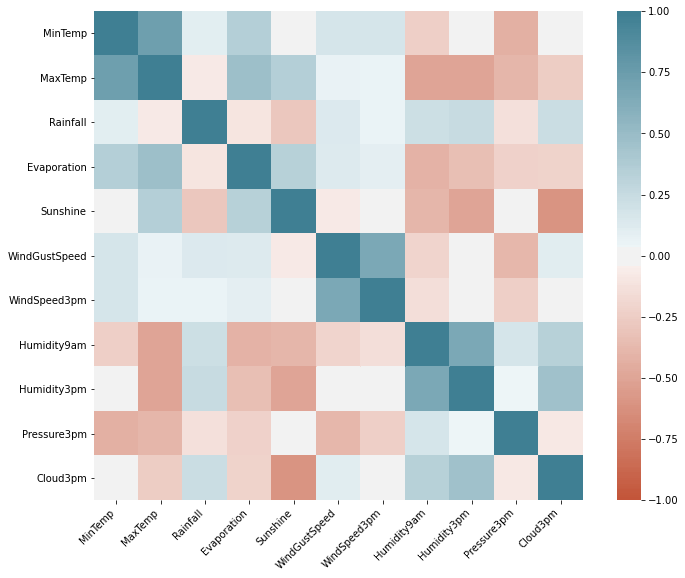

In [24]:
# @write your code in this cell, adapt the code wherever you find an @edit marker

corr = data_sharp[final_numeric_cols_all].corr() # @edit to make it work with data_sharp 

abs_threshold = 0.6 # @edit to pick up the right correlation threshold aucune idée 

print('correlations above threshold between: ')
print('-------------------------------------')
for i in np.arange(len(final_numeric_cols_all)):
    buff = corr.iloc[i,i+1:]
    interest = buff[np.abs(buff)>abs_threshold]
    for elem in interest.index:
        print(final_numeric_cols_all[i]+' & '+elem+' | rho = '+str(interest[elem]))
        
plt.figure(figsize=(12,9))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

>COMMENTS

@write your comments here

 <div class="alert alert-warning">
    <b>[Question 2.6] And now? </b>  <br><br>
Based on the above results would it be reasonable to discard some features due their redundancy ? <br>
    Briefly <b>explain</b> which features you would prune at this stage and <b>why</b>.<br>
    Then, just <b>DO</b> it!
</div>

Please note that, normally, you should keep <i>RainToday</i>...

In [22]:
# @adapt with the results obtained
toDiscard = ['WindSpeed9am','Cloud9am','Pressure9am','Temp9am','Temp3pm']

data_sharp.drop(columns=toDiscard,inplace=True)

# applying the same commands to our test batch 
data_test_sharp.drop(columns=toDiscard,inplace=True)

# update cols_all
cols_all = list_difference(cols_all,toDiscard)
final_numeric_cols_all = data_sharp.select_dtypes(include=np.number).columns.tolist()
final_numeric_cols_all = list_difference(final_numeric_cols_all,['RainToday'])

>EXPLANATION

<strong>Answer : </strong>We discard WindSpeed9am,Cloud9am,Temp9am and Pressure9am because they were big corrolated to the same feature which were recorded earlier. We also deleted Temp3pm because it was also big corrolated to MaxTemp and MinTemp.

---

<font size=7 color=#009999> <b>PART 3 - CLASSIFICATION / PERFORMANCE ESTIMATION </b> </font> <br><br> 

<font size=5 color=#009999> <i>Encode string variables</i> </font> <br> <br>

Most algorithms are not able to deal categoric variables, and need the data to be integer or float.

In [ ]:
## /!\ only useful if data_sharp is data_drop_it_all /!\

from sklearn.preprocessing import OrdinalEncoder 
enc = OrdinalEncoder()
toEncode = data_sharp.select_dtypes(object)
toEncode = enc.fit_transform(toEncode)
data_sharp[data_sharp.select_dtypes(object).columns] = toEncode

<font size=5 color=#009999> <b>3.1 - BRIEF FEATURE SELECTION </b>

Unlike explicit programming, machine learning is a form of AI that enables a system to learn from directly from data. Modern day datasets are very rich in information with data collected from millions of IoT devices and sensors. This makes the data high dimensional and it is quite common to see datasets with hundreds of features. <br>

Feature Selection/Extraction is a very critical component in a Data Scientist’s workflow. When presented data with very high dimensionality, models usually choke because:
   - Training time increases exponentially with number of features. Ressources need also to be allocated for uninformative features. 
   - Models have increasing risk of overfitting with increasing number of features (curse of dimensionality). Uninformative features then act as noise for the machine learning model that can perform terribly poorly.

<div class="alert alert-info">
    <b>Feature selection</b> is "the process of selecting subset of relevant features for processing, without any transformation". Such methods consider the relationship between features and the target variable to compute the importance of features. 
</div>

There exist plenty of ways to assign an importance score to a given subset of features. We will stick to the most easy one consisting in computing the **[Point-biserial correlation coefficient](https://en.wikipedia.org/wiki/Point-biserial_correlation_coefficient)** of each remaining numerical feature with respect to the *categorical* target *RainTomorrow*. <br><br><b><font color='purple'>We will not quantify the categorical feature *RainToday* as we intend to keep it anyway.</font></b> Its score will be arbitrarily set to $1$.

<div class="alert alert-warning">
    <b>[Question 3.1] Quick look at one-to-one correlations </b>  <br><br>
    <b>Rank</b> in descending order each feature according to its point-biserial correlation coefficient with <i>RainTomorrow</i>. That is <b>store</b> their names in a Python list, the first entry must be <i>RainToday</i> and then the order will be determined by the susmentionned scores. Make use of the function <samp>pointbiserial</samp> from the package <samp>stats</samp>.
</div>

In [ ]:
'''
HERE BELOW WE GIVE YOU SOME HANDFUL FUNCTIONS
'''

# convert slabels Yes and No as numerical 1 and 0 for sklearn purpose
def labels_to_numerical(labels):
    buf = []
    for label in labels:
        if label=='Yes':
            buf.append(1)
        else:
            buf.append(0)
    return buf

labels= labels_to_numerical(data_sharp['RainTomorrow'])
labels_test = labels_to_numerical(data_test_sharp['RainTomorrow'])

In [ ]:
# computation of the feature scores, factice code here with random scores @edit
myData = [['RainToday',1]]
for feature in final_numeric_cols_all:
    feature_point_biserial_score = np.random.uniform() # @edit: compute the point biserial correlation asked
    myData.append([feature,feature_point_biserial_score])
    
rankedFeatures = pd.DataFrame(data=myData,columns=['Feature','Score'])
rankedFeatures.set_index('Score',inplace=True)
rankedFeatures.sort_index(ascending=False,inplace=True)
rankedFeatures.head(20)

In the next part of this hackathon will the model fitting take place. We would like to keep at most $10$ features in our dataframe. <br><br> If your list above contains more than $10$ features, only the $10$ most correlated features to the target are kept in <i>data_sharp</i>. Else, nothing is done...

In [ ]:
limit = 10
ranked_features_list = rankedFeatures['Feature'].values

if len(ranked_features_list)>limit:
    data_sharp = data_sharp[ranked_features_list[:limit]]
    
data_sharp.head(5)

<font size=5 color=#009999> <b>3.2 - CROSS-VALIDATION AS PERFORMANCE ESTIMATOR </b>

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. 

- This situation represents the ultimate example of what is usually called **overfitting**. 

To evaluate the performance of any machine learning model we need to test it on some unseen data. Cross validation (CV) is one of the technique used to test the effectiveness of a machine learning models, it is also a re-sampling procedure used to evaluate a model if we have a limited data. To perform CV we need to keep aside a sample/portion of the data on which is do not use to train the model, later us this sample for validating. 

K-Fold CV is where a given (learning) dataset is partioned into a $K$ number of sections/folds where each fold is used as a testing set at some point.<br> Let us take the scenario of $5$-Fold cross validation ($K=5$). Here, the data set is split into $5$ folds. In the first iteration, the first fold is used to test the model (according to a certain accuracy measure pre-defined) and the rest are used to train the model. In the second iteration, 2nd fold is used as the testing set while the rest serve as the training set. This process is repeated until each fold of the 5 folds have been used as the testing set.

<img src="Imgs/K-fold.png" width = "900">

<div class="alert alert-info">
<b>K-Fold</b>  <br>
To implement a K-fold CV in python, use the KFold object (in <samp>klearn.model_selection</samp>) with $K = 10$ folds, and its indices-splitting function split. One call to this function will generate $K$ pairs of lists of indices. In each pair, the first indicates the indices used for training set, and the second gives the indices used for the test set.
</div>



To help you, here is a pseudo algorithm of K-fold in which you just have to substitute the proper functions for each model (see subsequent sections, you will use a K-fold cross-validation for 3 classification algorithms described later):

<img src="Imgs/K-fold_pseudo-code.png" width = "600">

<div class="alert alert-warning">
    <b>[Question 3.2] K-CV implementation </b>  <br><br>
    <b>Implement</b> a $K=10$-folds Cross-Validation in order to estimate the <i>F1</i> accuracy measure of a trained predictor (Logistic Regression as announced in the main instructions) on our cleaned and worked-out <i>data_sharp</i>. The estimate you <b>provide</b> should be the mean <i>F1</i> score over the $K$ folds. 
<br>
<br>
    <b>Give</b> 1 pro and 1 con of the <i>F1</i> accuracy measure.
    <br> <br>
<b>Note that the recall and precision must be taken with respect to the class 'Yes' as True Positive !</b>
</div>


(see [Wikipedia](https://en.wikipedia.org/wiki/F1_score) for further informations about this accuracy metric)

<img src="Imgs/confusionbis.png" width = "1000">

In [ ]:
'''
HERE BELOW WE GIVE YOU SOME HANDFUL FUNCTIONS
'''
from sklearn.metrics import confusion_matrix

# converts a vector of values from 0 to 1 to a label Yes or No considering the threshold that is provided
def pred_probas_to_pred_labels(probs_vec,threshold=0.5):
    buf = []
    for prob in probs_vec:
        if prob>threshold:
            buf.append('Yes')
        else:
            buf.append('No')
    return buf

# based on the confusion matrix, computes the 'recall'
def cm_to_recall(confusion_matrix):
    return confusion_matrix[1,1]/np.sum(confusion_matrix[1,:])


# @edit , same as above but computes the 'precision'
def cm_to_precision(confusion_matrix):
    print('to edit')
    return 0

# @edit overall F1 measure computation for the chosen threshold based on the output of our predictor
def probas_to_F1(probs_vec,true_labels,threshold=0.5):
    predicted_labels = probas_to_labels(probs_vec,threshold)
    cm = confusion_matrix(true_labels,predicted_labels)
    print('to edit')
    return 0

In [ ]:
# code sample for model training

# here is how to simply fit a logistic regression model based on a dataframe of features X and with corresponding numerical targets in y  
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# taking again the 'diabetes' example from Part 2, Outcome is the target (already in numeric 1 vs. 0)
X, y = diabetes.drop(columns=['Outcome']).values,diabetes['Outcome'].values
clf = LogisticRegression(random_state=0).fit(X, y)

# predict the label (diabete or not diabete) for the two first tuples of X
pred_probas = clf.predict_proba(X[:2, :])[:,1]
print('predicted')
print(pred_probas_to_pred_labels(pred_probas,threshold=0.5))
print('true labels')
print(pred_probas_to_pred_labels(y[:2],threshold=0.5))

Your full $K$-CV should be written here below

In [ ]:
# @implement here a function or just some code of lines in order to produce the estimate of the F1 score of 
# a logistic regression based classifier that 'learns' from data_sharp

>ESTIMATION F1 SCORE 

@write your comments here

>PRO F1

@write your comments here

>CON F1

@write your comments here

<div class="alert alert-warning">
    <b>[Question 3.3] Comparison </b>  <br><br>
Finally, <b>compute</b> the <i>F1</i> score of a model trained on the whole dataset <i>data_sharp</i> with respect to the test set we have kept from the very beginning of the hackaton. <b>Compare</b> and <b>comment</b> the results against your performance estimate in 3.2
</div>

>COMPARISON

@write your comments here

<div class="alert alert-warning">
    <b>[BONUS] INVESTIGATION OF THE THRESHOLD ? </b>
</div>